# Projet Traitement du Signal

Romain LAGARDE, Tom SCHIPPKE


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

**Remarque:**

Lors de tous les tracés de spectre, on ne tracera que la partie des fréquences positives pour plus de lisibilité. Le spectre étant symétrique par rapport à l'origine, il est simple de s'imaginer l'affiche des fréquences positives et négatives.

## I. Modulation et démodulation DSB-SC

### A. Modulation



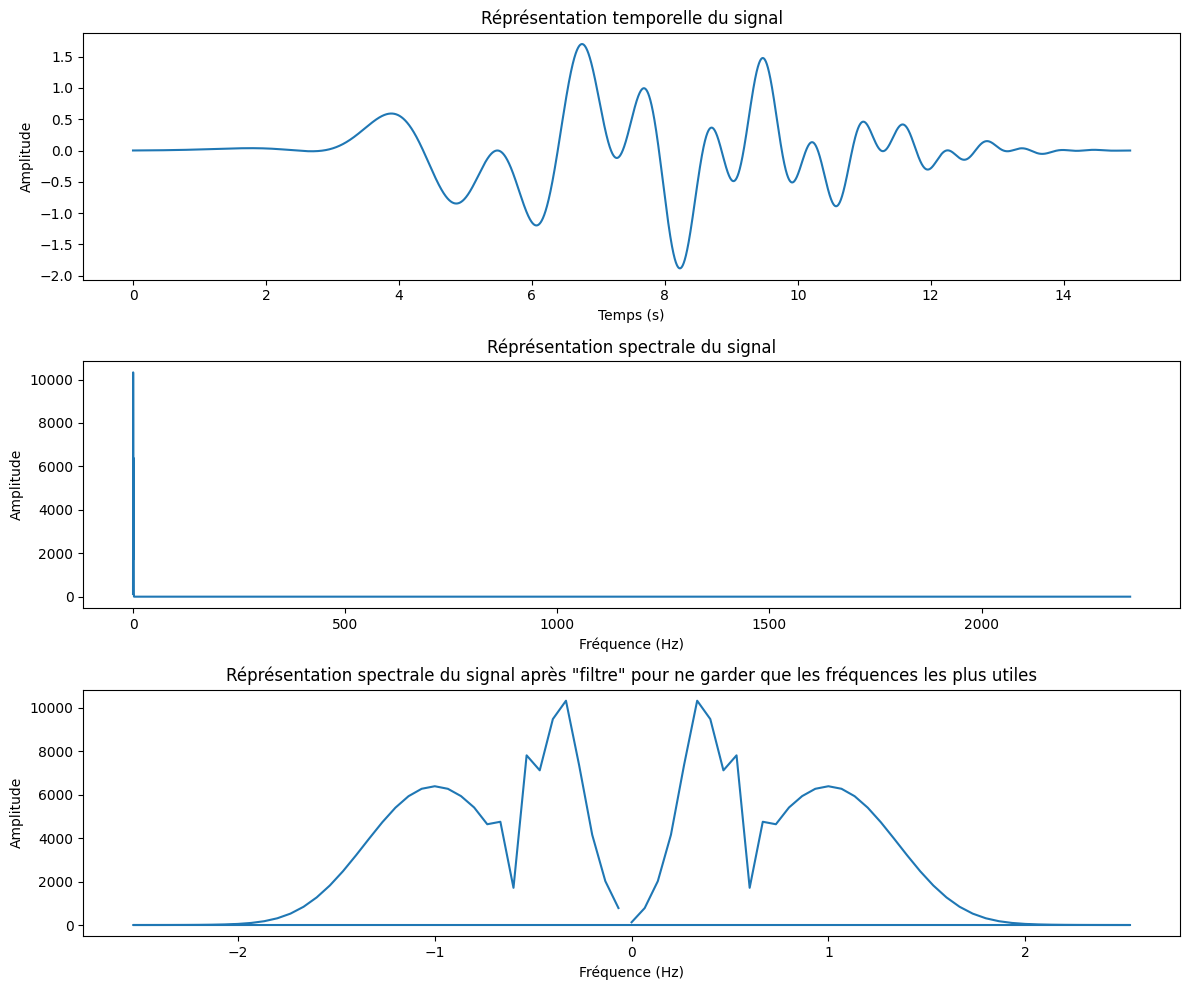

In [2]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal')

#Représentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')

indice_à_garder = np.abs(X) > 1
X_tild=X[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


La Fréquence maximale du signal est approximativement **B=2Hz**.


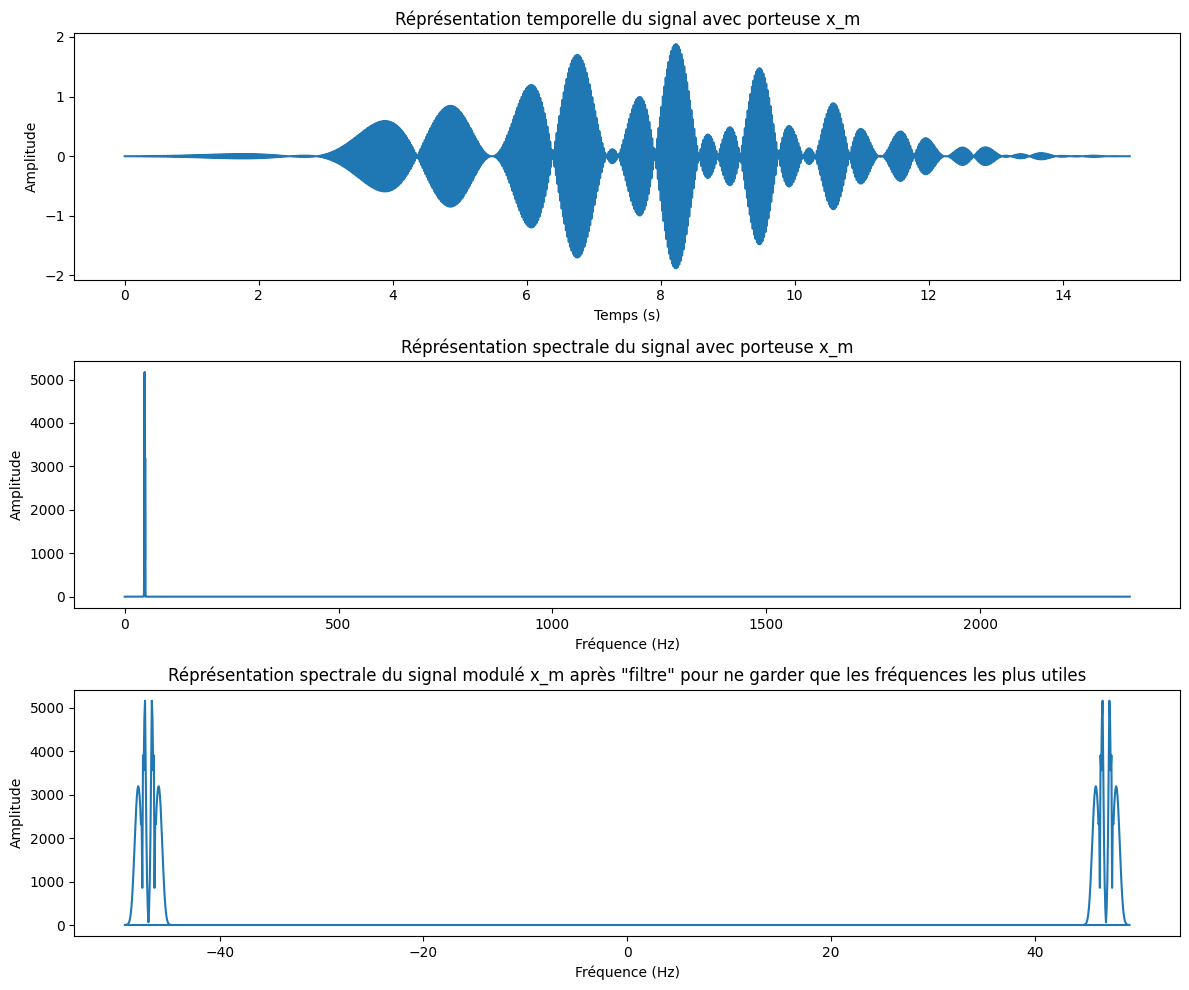

In [3]:
#fabrication du signal modulé
x_m=x*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation à double bande latérale et porteuse supprimée) car **l'onde modulée est seulement constituée des bandes latérales supérieure et inférieure du signal**.

### B. Démodulation synchrone “analogique”

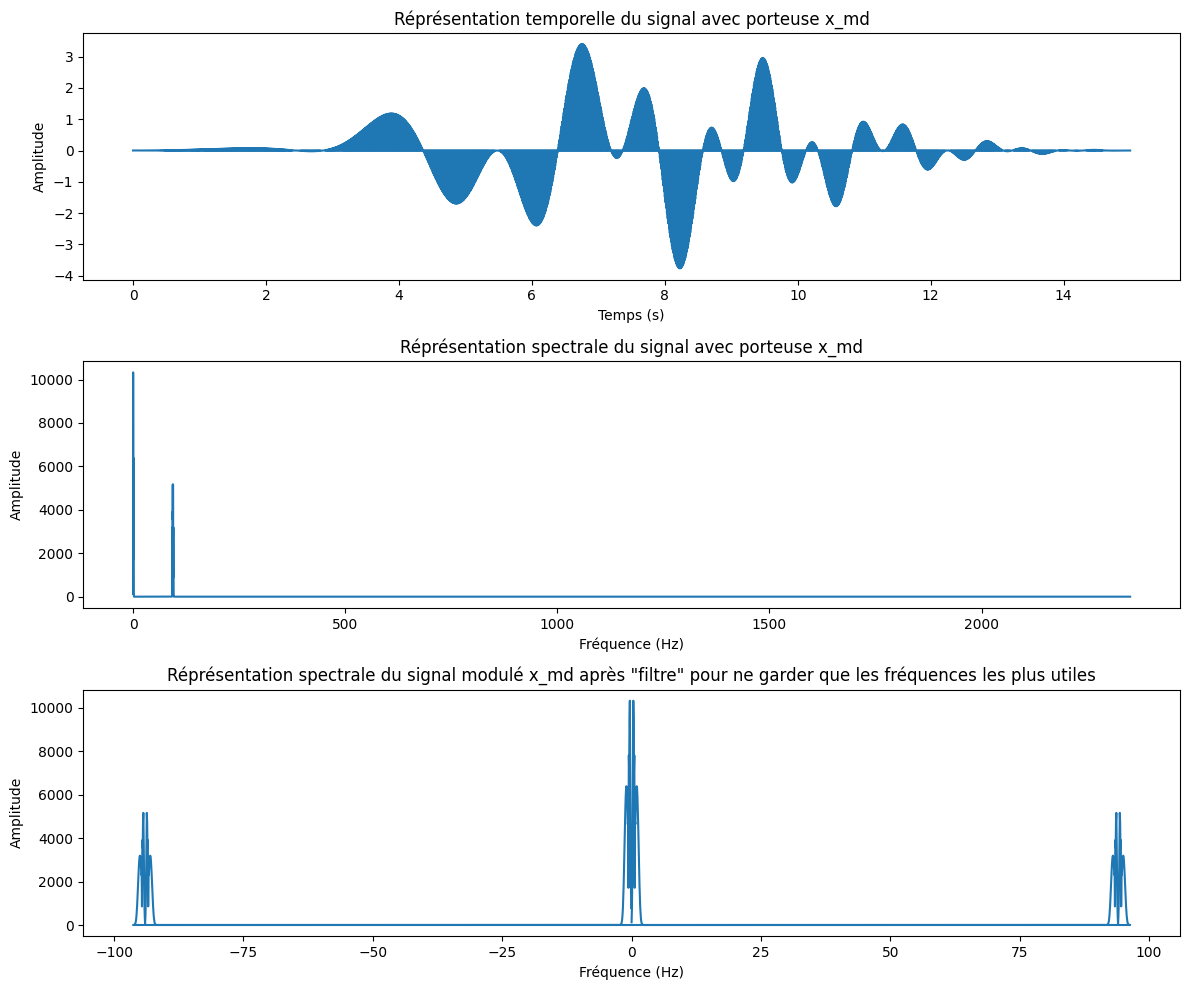

In [4]:
#fabrication du signal modulé
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')

indice_à_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


Pour filtrer le signal, on utilise un **filtre de Butterworth** de fréquence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement idéal). On choisit ces valeurs numériques au vu des tracés et études précédentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du à la modulation).


c:\miniconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


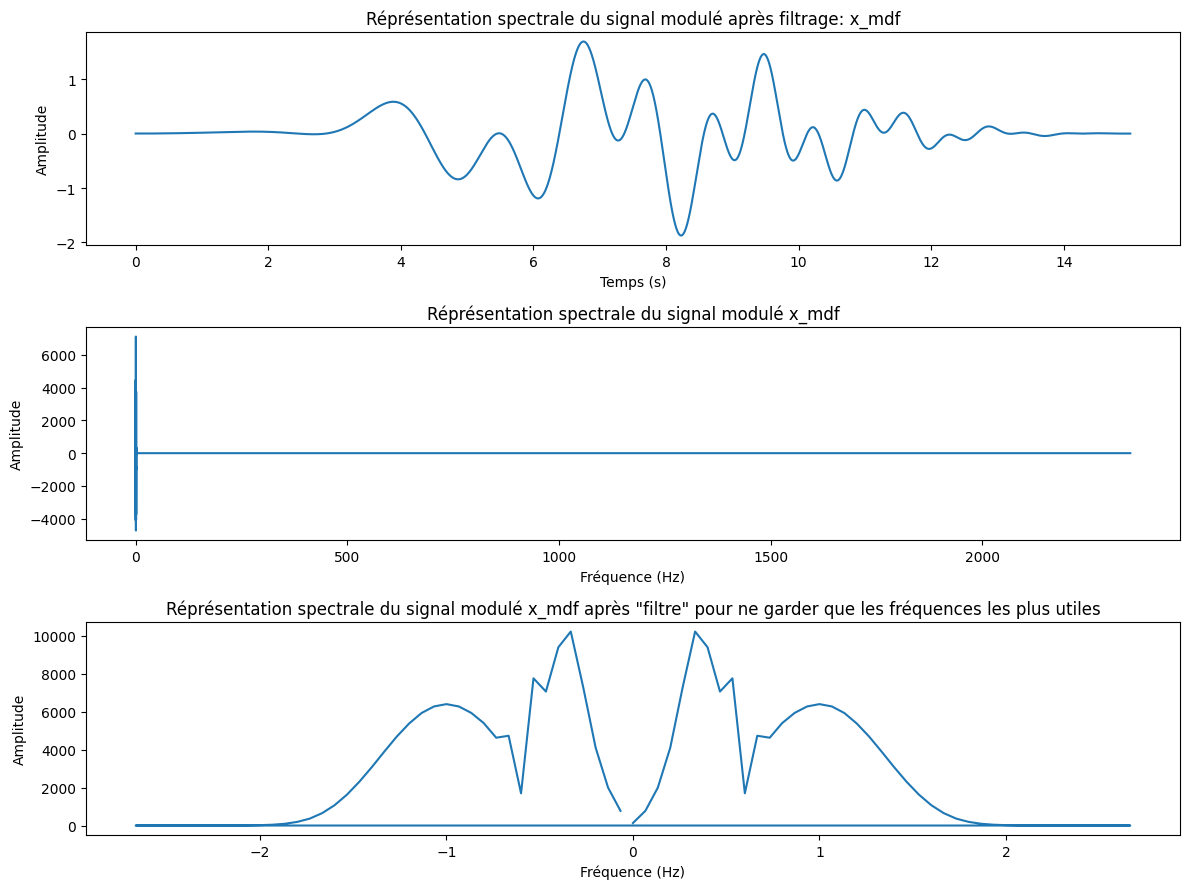

In [5]:
#filtre passe bas de fréquence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé après filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf')

indice_à_garder = np.abs(X_mdf) > 0.5
X_mdf_tild=X_mdf[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. En filtrant les hautes fréquences, on a supprimé les composantes spectrales de fréquence plus grande que 40Hz. Ainsi, on a supprimer la modulation ajoutée sur le signal.



Pour un échantillonage après démodulation, il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un échantillonage avant démodulation, il faudrait échantillonner $x_{m}$ à une fréquence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est préférable d'échantillonner le signal **après démodulation**, car ce dernier sera moins coûteux (fréquence d'échantillonnage $f_e$ plus faible dans ce cas).

### C. Démodulation synchrone par sous-échantillonnage


[]

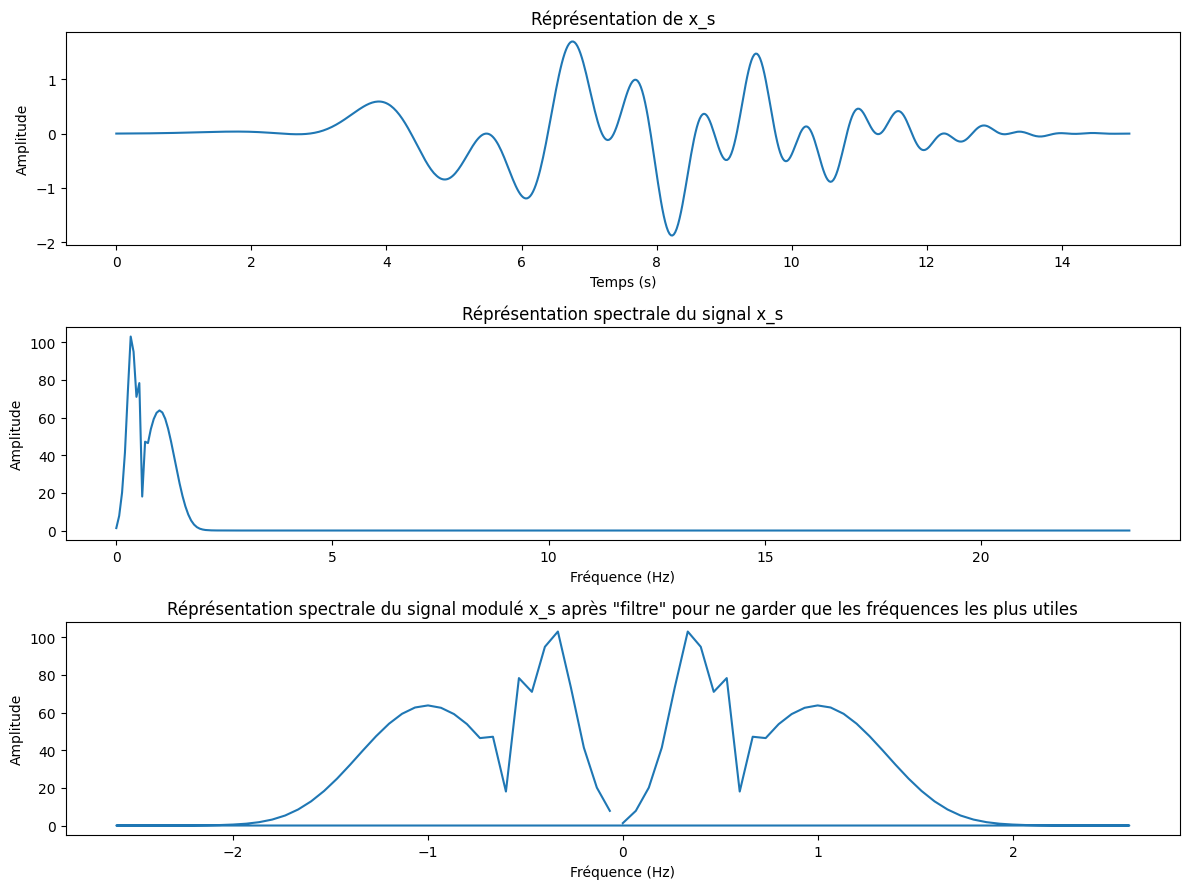

In [6]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')

indice_à_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_à_garder]
freq_s_tild=freq_s[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_s après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en échantillonnant à une fréquence 47Hz): avec une fréquence bien choisie, on ne "récupère" lors de l'échantillonage que les extremas de l'enveloppe du à la modulation (i.e. du à la multiplication par $cos(2 \pi f_c t)$).

Cette méthode à l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'économiser de la bande passante.



## II. Modulation-démodulation DSB-SC avec sinus

### A. Modulation


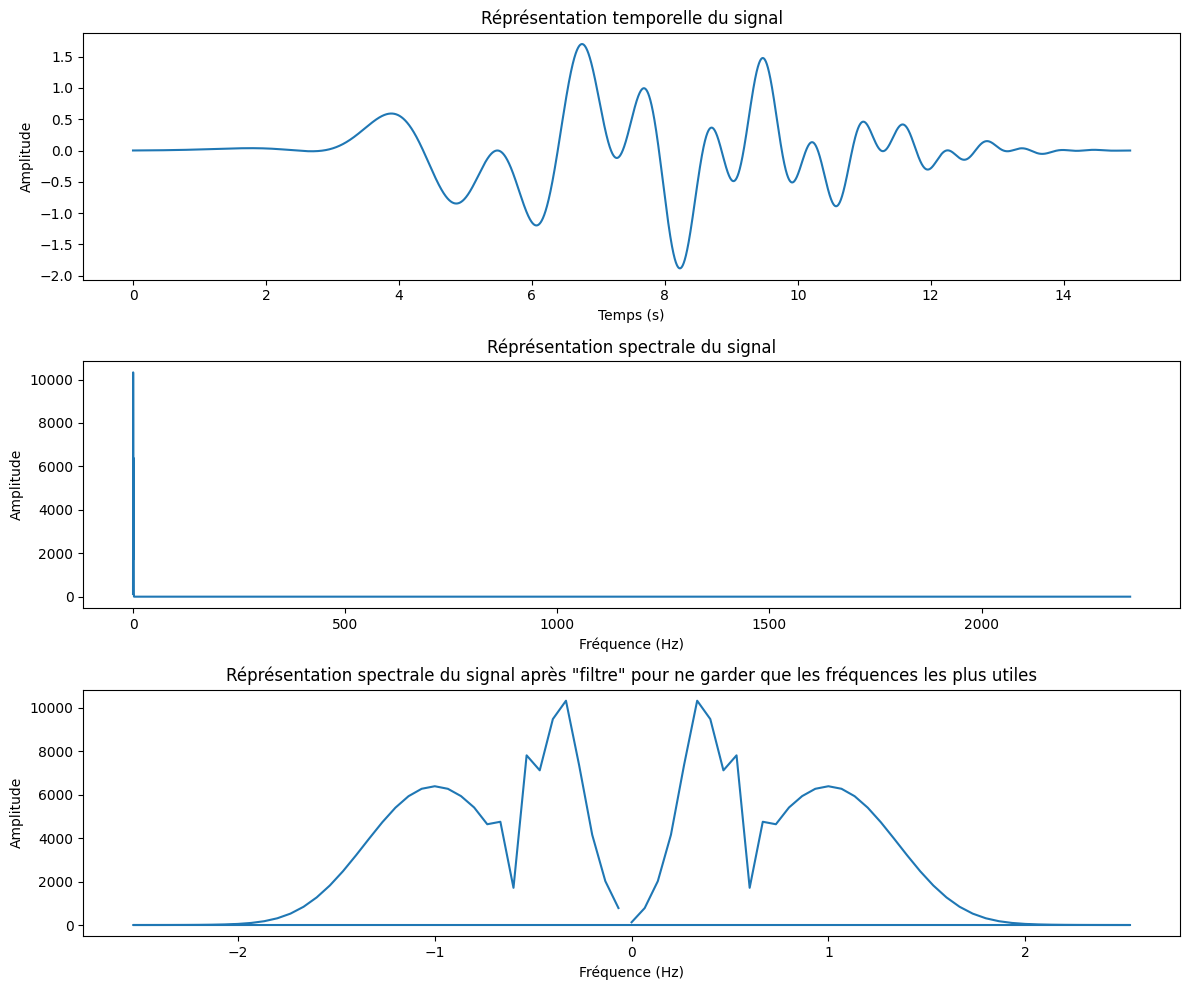

In [7]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal')

#Représentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')

indice_à_garder = np.abs(X) > 1
X_tild=X[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

La Fréquence maximale du signal est approximativement **B=2Hz**.


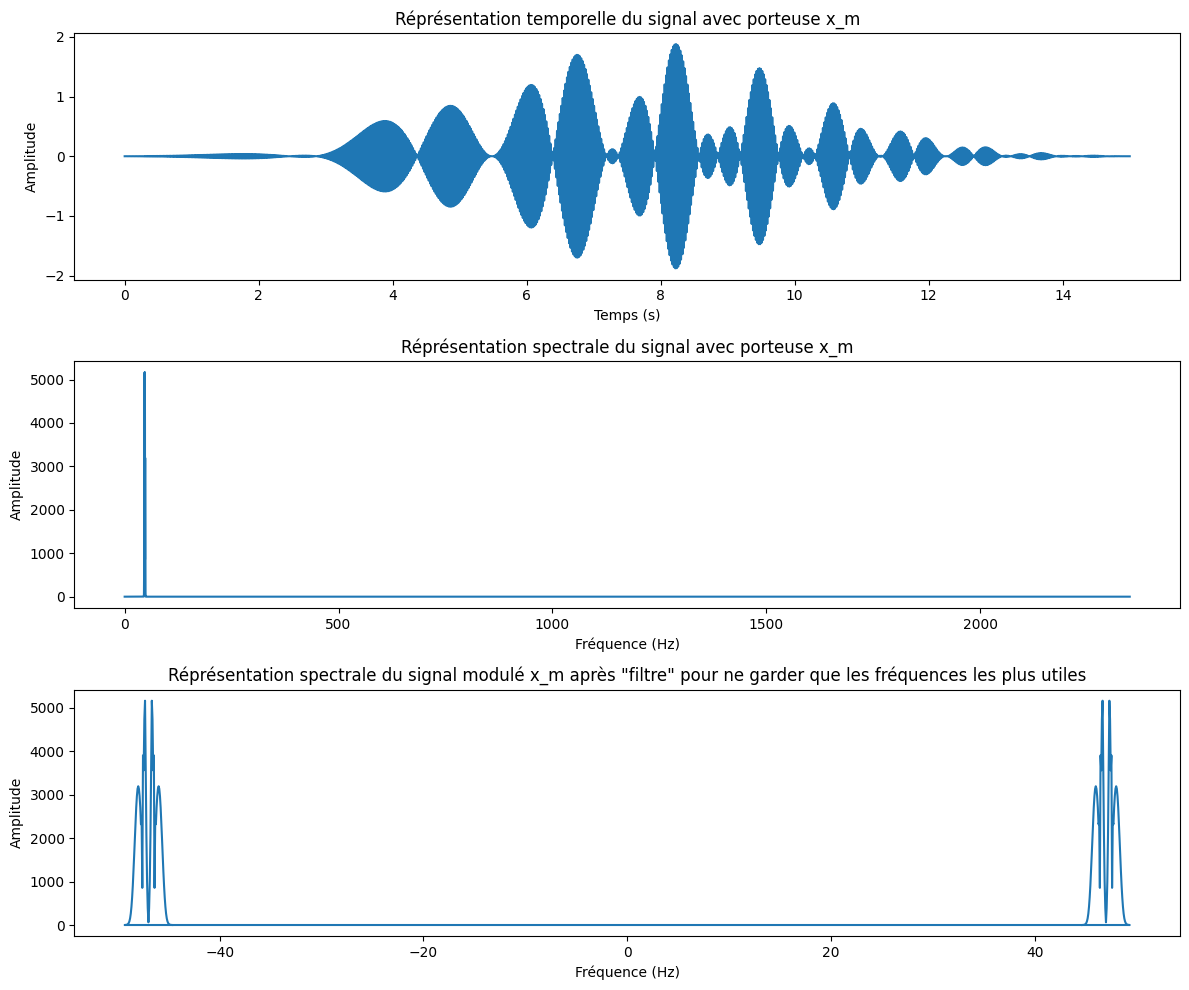

In [8]:
#fabrication du signal modulé
x_m=x*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation à double bande latérale et porteuse supprimée) car **l'onde modulée est seulement constituée des bandes latérales supérieure et inférieure du signal**.

### B. Démodulation synchrone “analogique”

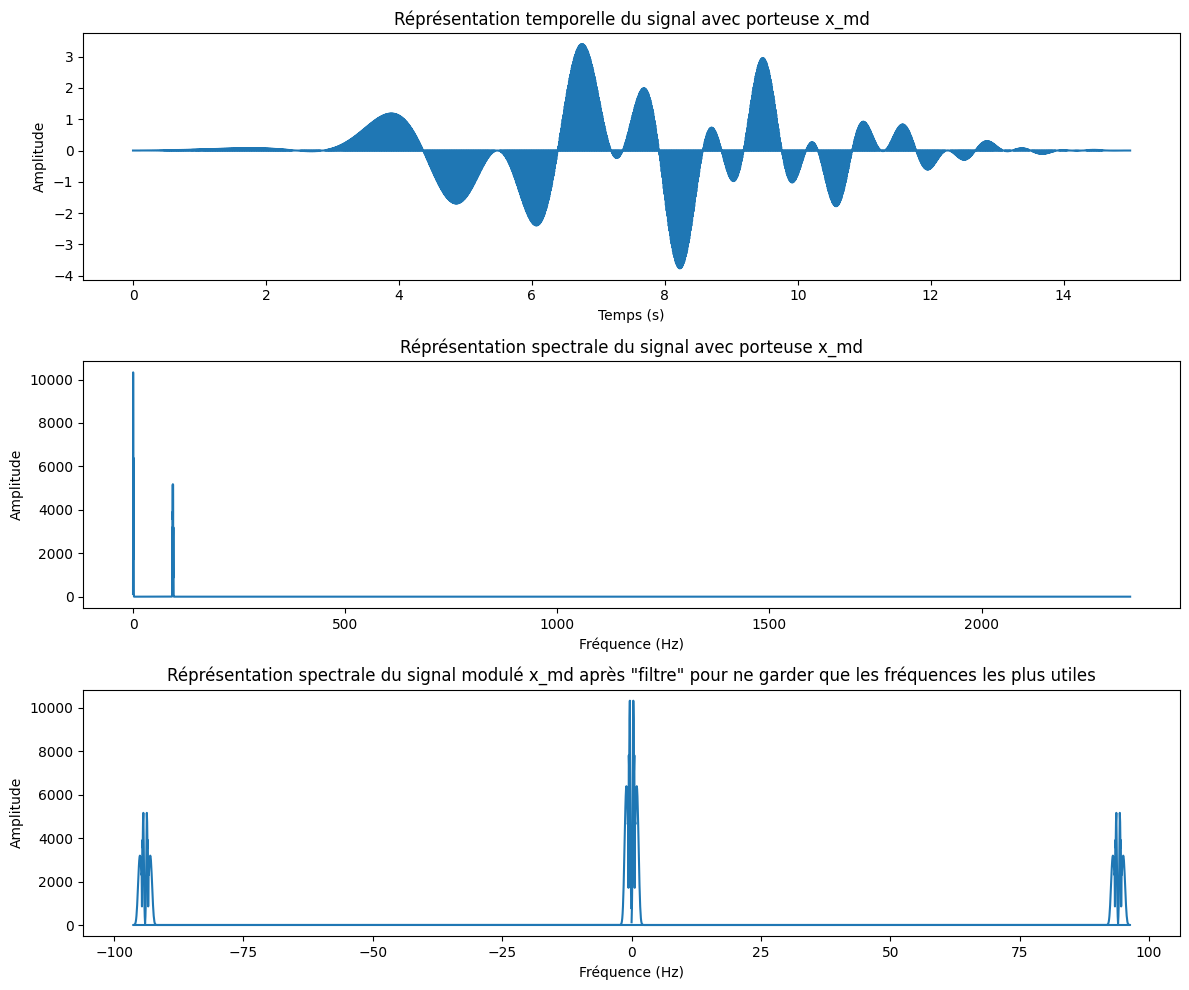

In [9]:
#fabrication du signal modulé
x_md=2*x_m*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')

indice_à_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


Pour filtrer le signal, on utilise un **filtre de Butterworth** de fréquence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement idéal). On choisit ces valeurs numériques au vu des tracés et études précédentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du à la modulation).


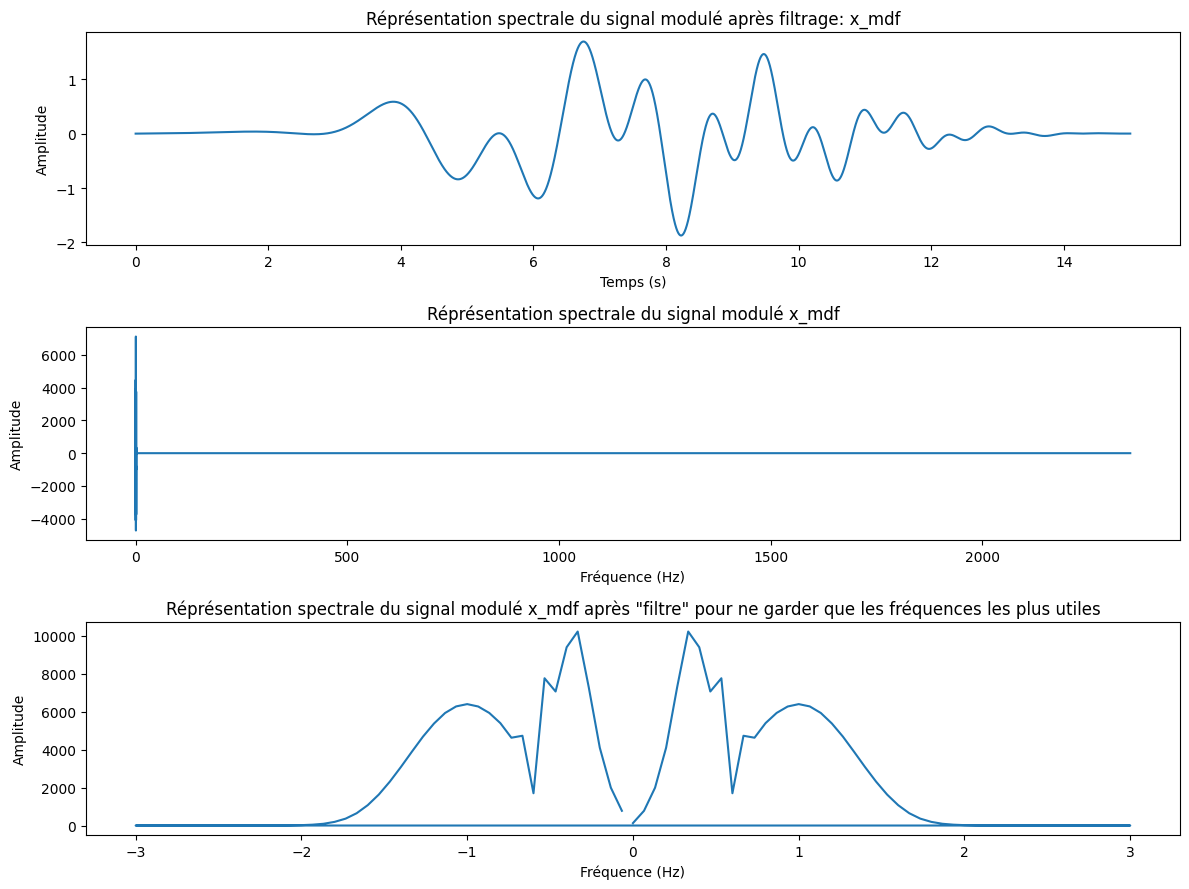

In [10]:
#filtre passe bas de fréquence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40


num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)


#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé après filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf')

indice_à_garder = np.abs(X_mdf) > 0.5
X_mdf_tild=X_mdf[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de même très légerment présente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre supérieur.

Pour un échantillonage après démodulation, il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un échantillonage avant démodulation, il faudrait échantillonner $x_{m}$ à une fréquence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est préférable d'échantillonner le signal **après démodulation**, car ce dernier sera moins coûteux (fréquence d'échantillonnage $f_e$ plus faible dans ce cas).

### C. Démodulation synchrone par sous-échantillonnage


Cette fois ci, afin de tenir ocmpte du fait que la modulation s'est faite avec la fonction $sinus$, on ajoute un décalage temporel de $\frac{1}{4f_c}$ afin d'être sur de toujours récupérer les "extremas" de l'enveloppe de la modulation (et non pas les "quarts" d'extremas du au déphasage du $sinus$ par rapport au $cosinus$).

[]

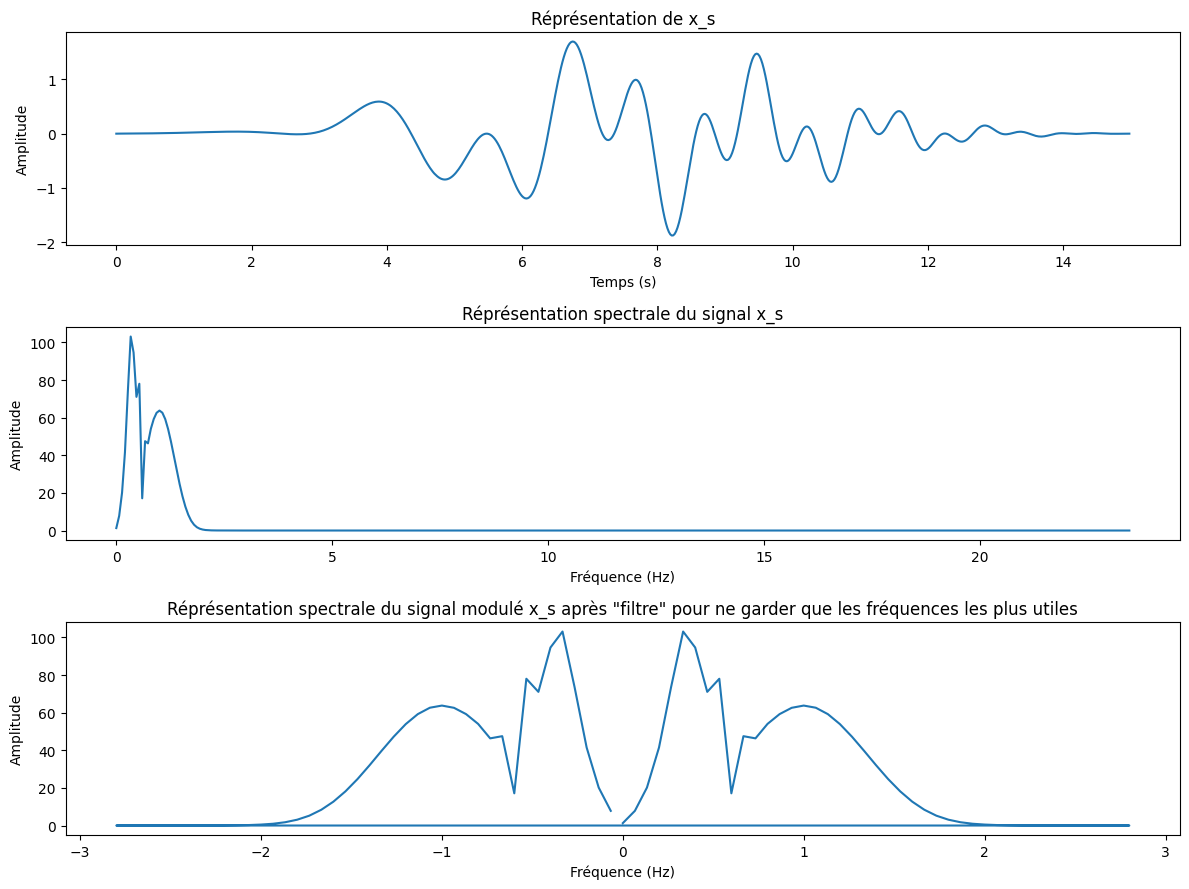

In [11]:
n=1

N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_s=[]
t1=[]
t_comp=int(0)
indice=0
while indice<(N_m-1):
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt
    indice=int(np.floor((t_comp+1/(4*fc))*N_m/T))


x_s=np.array(x_s)
t1=np.array(t1)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')

indice_à_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_à_garder]
freq_s_tild=freq_s[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_s après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.plot()

On ne retrouve pas le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en échantillonnant à une fréquence 47Hz): avec cette fréquence bien choisie, on ne "récupère" lors de l'échantillonage que les extremas de l'enveloppe du à la modulation (i.e. du à la multiplication par $cos(2 \pi f_c t)$). On peut récupérer ces extremas en ajoutant un décalage temporel pour palier le fait que nous avons désormais travaillé avec un $sinus$ (et non plus un $cosinus$).

Cette méthode à l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'économiser de la bande passante.



## III. Modulation et démodulation QAM (Quadrature Amplitude Modulation)

La modulation DSB-SC vu précédement “gaspille” de la bande passante car en modulant le signal initial, on a élargi sa largeur spectrale (d'un facteur 2 dans le cas précédent car le spectre est devenu pair).  Dans cette partie on verra que l'on peut transmettre deux signaux différents avec la même largeur spectrale pour $x_m$ ce qui représente un gain de bande passante de $50$%.


On s'intéresse désormais au signal modulé $x_m(t) = x_I(t) cos(2\pi f_ct) + x_Q(t) sin(2\pi f_ct)$.


Pour le cas de la **démodulation synchrone “analogique”**, les identités trigonométriques permettent de montrer que le filtrage permetra dans un cas de récupérer $x_I$ et dans l'autre $x_Q$.


-Pour récupérer $x_I$:


$x_{mdI}(t)=2x_m(t)cos(2\pi f_ct)=  2(x_I(t) cos(2\pi f_ct)^2 + x_Q(t) sin(2\pi f_ct)cos(2\pi f_ct)) = x_I(t) + x_I(t)cos(4\pi f_ct) + x_Q(t)sin(4\pi f_ct) $.

Ainsi, en filtrant $x_{mdI}$ à une fréquence $f_e$ bien choisie on ne gardera que $x_I$ (sous l'hypothèse que les fréquences maximales de $x_I$ et $x_Q$ soit bien inférieures à $2f_c$).



-Pour récupérer $x_Q$:

$x_{mdQ}(t)=2x_m(t)sin(2\pi f_ct)=  2(x_I(t) cos(2\pi f_ct)sin(2\pi f_ct) + x_Q(t) sin(2\pi f_ct)^2) = x_Q(t) - x_Q(t)cos(4\pi f_ct) + x_I(t)sin(4\pi f_ct)$.

De même, en filtrant $x_{mdQ}$ à une fréquence $f_e$ bien choisie on ne gardera que $x_Q$ (sous l'hypothèse que les fréquences maximales de $x_I$ et $x_Q$ soit bien inférieures à $2f_c$).

Pour le cas de la **démodulation synchrone par sous-échantillonnage**, étant donné le déphasage mis en lumière précédement entre le $cosinus$ et le $sinus$, il est possible en choisissant une fréquence d'échantillongae ou l'autre (cf partie I.C et II.C) d'uniquement récupérer  les extremas correspondants à un des deux signaux. 

Par exemple comme le $sinus$ s'annule quand le $cosinus$ est extremum, en échantillonant à la même fréquence que dans I.C, on ne récupèrerera que les valeurs lors des extremas du $cosinus$ (et on ne récuperera rien du $sinus$ étant donné que ce dernier sera nul aux instants d'échantillonage) correspondant donc aux valeurs du signal $x_I$. Il est ainsi possible de resconstruire $x_I$ à partir de $x_m$. 

De même pour $x_Q$.

### A. Modulation

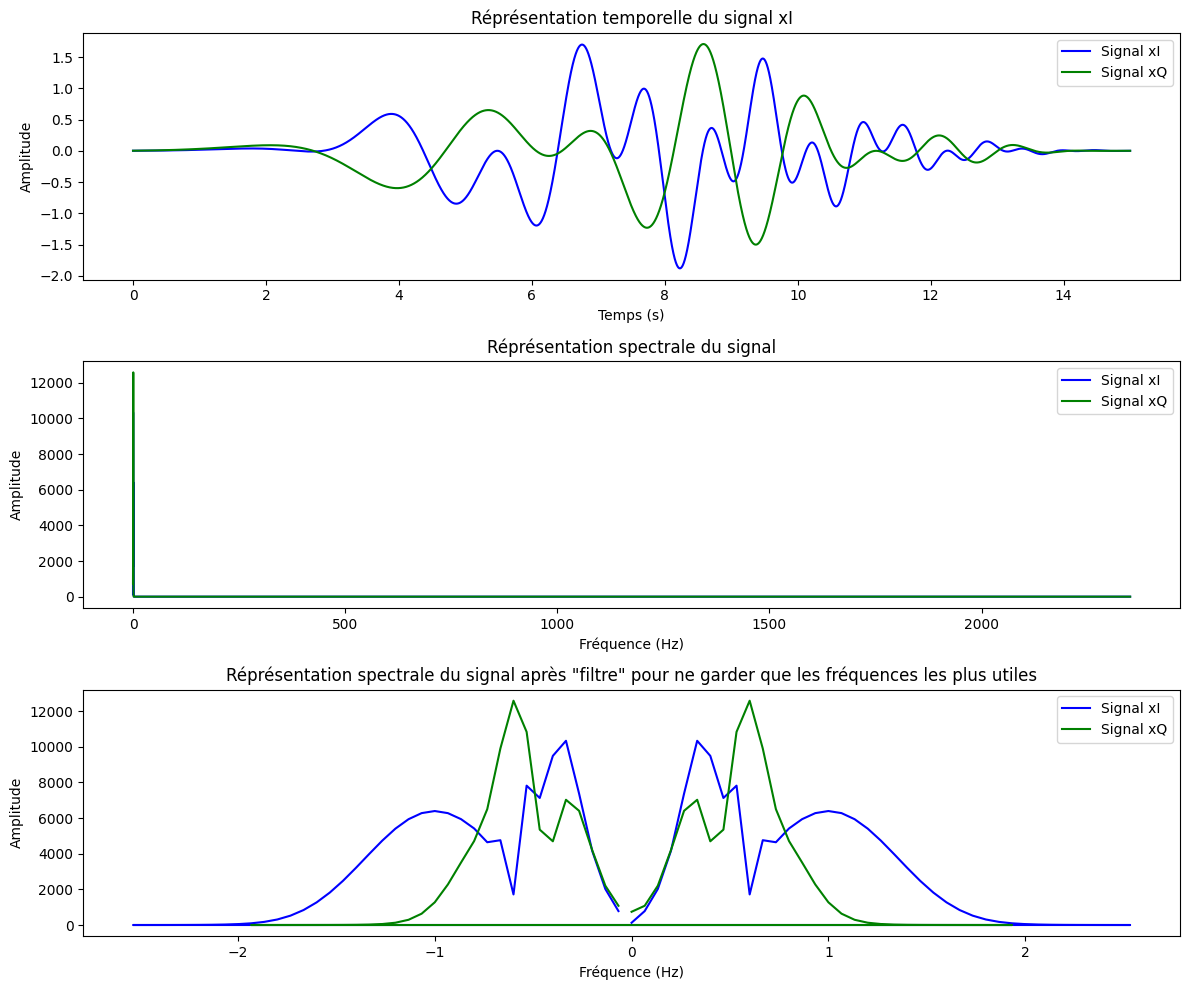

In [12]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRawI = np.cos(pulsation1*t) + np.sin(pulsation2*t)
xRawQ = np.cos(pulsation1*t*3/5) + np.cos(pulsation2*t*10/9)


window = sig.windows.kaiser(N,9)
xI = xRawI*window
xQ = xRawQ*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,xI,color='blue', label='Signal xI')
plt.plot(t,xQ, color ='green', label='Signal xQ')

plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal xI')
plt.legend(loc='upper right')

#Représentation de la fft du signal

XI=np.fft.fft(xI)
freqI=np.fft.fftfreq(N, d=1/finfty)
XQ=np.fft.fft(xQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3,1, 2)
plt.plot(freqI[:N//2],np.abs(XI[:N//2]), color='blue', label='Signal xI') 
plt.plot(freqQ[:N//2],np.abs(XQ[:N//2]), color ='green', label='Signal xQ')  

plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')
plt.legend(loc='upper right')

indice_à_garderI = np.abs(XI) > 1
X_tildI=XI[indice_à_garderI]
freq_tildI=freqI[indice_à_garderI]
indice_à_garderQ = np.abs(XQ) > 1
X_tildQ=XQ[indice_à_garderQ]
freq_tildQ=freqQ[indice_à_garderQ]


plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_tildI), color ='blue', label='Signal xI')  
plt.plot(freq_tildQ,np.abs(X_tildQ), color ='green', label='Signal xQ')  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


La fréquence maximale est alors d'environ $B=2Hz$.

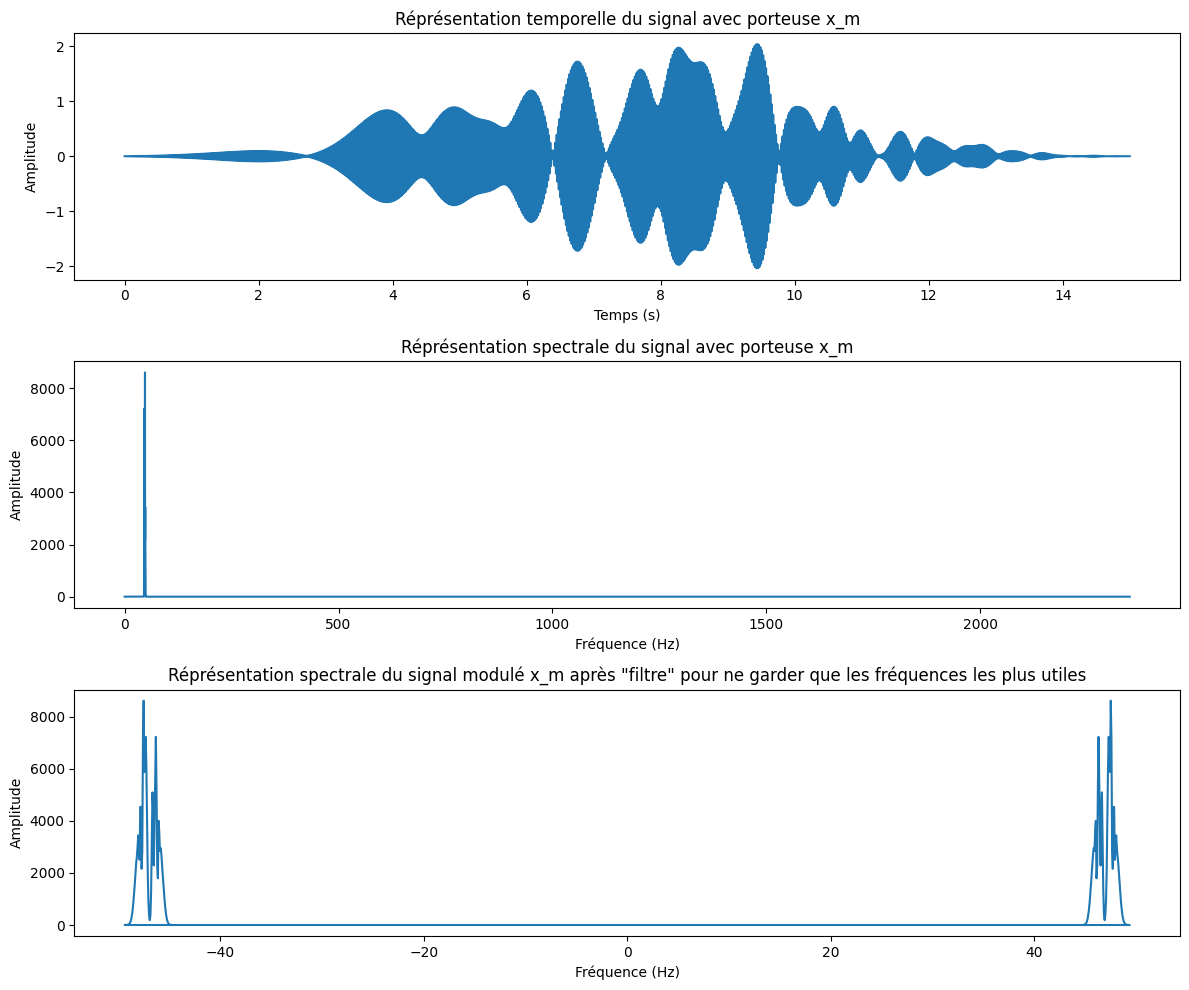

In [13]:
#fabrication du signal modulé
x_mIQ=xI*np.cos(2*np.pi*fc*t)+xQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mIQ)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_mIQ=np.fft.fft(x_mIQ)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_mIQ[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_mIQ) > 1
X_m_tildIQ=X_mIQ[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tildIQ))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On remarque qu'ici, tout comme dans I, la largeur spectrale est d'environ $4Hz$: on a bien "gagné" de la bande passante par rapport au cas I et II où l'on aurait transporté les signaux $x_i$ et $x_Q$ séparément (nécessitant l'envoie de deux signaux de largeur spectrale $4Hz$ chacun, pour un total de $8Hz$ à transporter). 

### B. Démodulation synchrone "analogique"

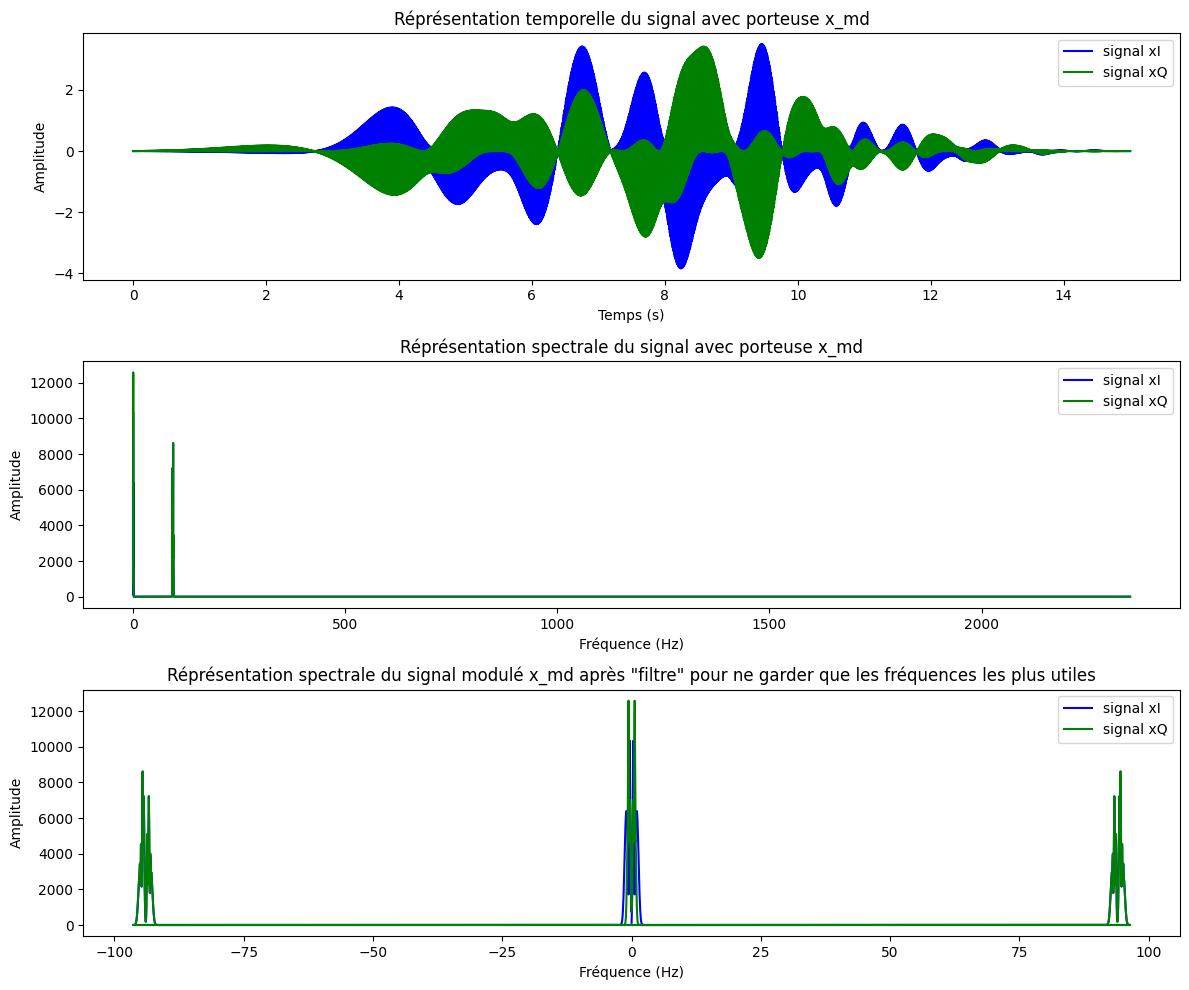

In [14]:
#fabrication du signal modulé
x_mdI=2*x_mIQ*np.cos(2*np.pi*fc*t)
x_mdQ=2*x_mIQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mdI, color='blue', label='signal xI')
plt.plot(t,x_mdQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')
plt.legend(loc='upper right')

X_mdI=np.fft.fft(x_mdI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdQ=np.fft.fft(x_mdQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],np.abs(X_mdI[:N//2]), color='blue', label='signal xI')
plt.plot(freqQ[:N//2],np.abs(X_mdQ[:N//2]), color='green', label='signal xQ')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')
plt.legend(loc='upper right')

indice_à_garderI = np.abs(X_mdI) > 1
X_md_tildI=X_mdI[indice_à_garderI]
freq_tildI=freqI[indice_à_garderI]
indice_à_garderQ = np.abs(X_mdQ) > 1
X_md_tildQ=X_mdQ[indice_à_garderQ]
freq_tildQ=freqQ[indice_à_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_md_tildI), color='blue', label='signal xI') 
plt.plot(freq_tildQ,np.abs(X_md_tildQ), color='green', label='signal xQ')  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


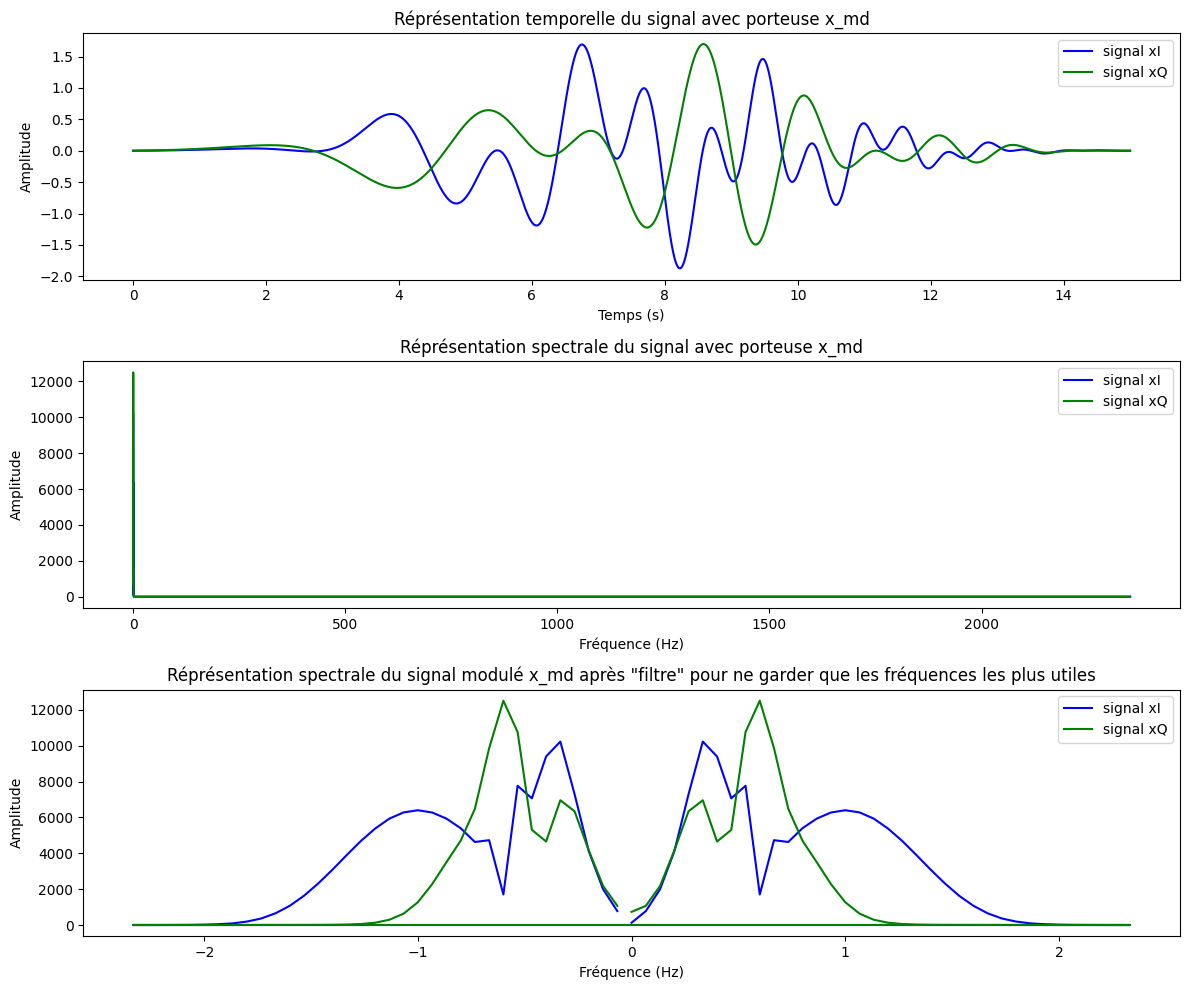

In [15]:
#filtre passe bas de fréquence de coupure: HZ
N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdfI=sig.filtfilt(num_low,den_low,x_mdI)
x_mdfQ=sig.filtfilt(num_low,den_low,x_mdQ)



# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mdfI, color='blue', label='signal xI')
plt.plot(t,x_mdfQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')
plt.legend(loc='upper right')

X_mdfI=np.fft.fft(x_mdfI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdfQ=np.fft.fft(x_mdfQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],np.abs(X_mdfI[:N//2]), color='blue', label='signal xI')
plt.plot(freqQ[:N//2],np.abs(X_mdfQ[:N//2]), color='green', label='signal xQ')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')
plt.legend(loc='upper right')

indice_à_garderI = np.abs(X_mdfI) > 1
X_mdf_tildI=X_mdfI[indice_à_garderI]
freq_tildI=freqI[indice_à_garderI]
indice_à_garderQ = np.abs(X_mdfQ) > 1
X_mdf_tildQ=X_mdfQ[indice_à_garderQ]
freq_tildQ=freqQ[indice_à_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_mdf_tildI), color='blue', label='signal xI') 
plt.plot(freq_tildQ,np.abs(X_mdf_tildQ), color='green', label='signal xQ')  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Comme prévu en multipliant d'une part par un $sinus$ ou par un $cosinus$, on peut récupérer les signaux initiaux uniquement à l'aide de $x_m$. En filtrant les hautes fréquences, on a supprimé les composantes spectrales de fréquence plus grande que $40Hz$. Ainsi, on a supprimer la modulation ajoutée sur le signal.


Dans les deux cas, pour un échantillonage après démodulation, il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un échantillonage avant démodulation, il faudrait échantillonner $x_{m}$ à une fréquence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est préférable d'échantillonner le signal **après démodulation**, car ce dernier sera moins coûteux (fréquence d'échantillonnage $f_e$ plus faible dans ce cas).


### C. Démodulation synchrone par sous-échantillonnage

[]

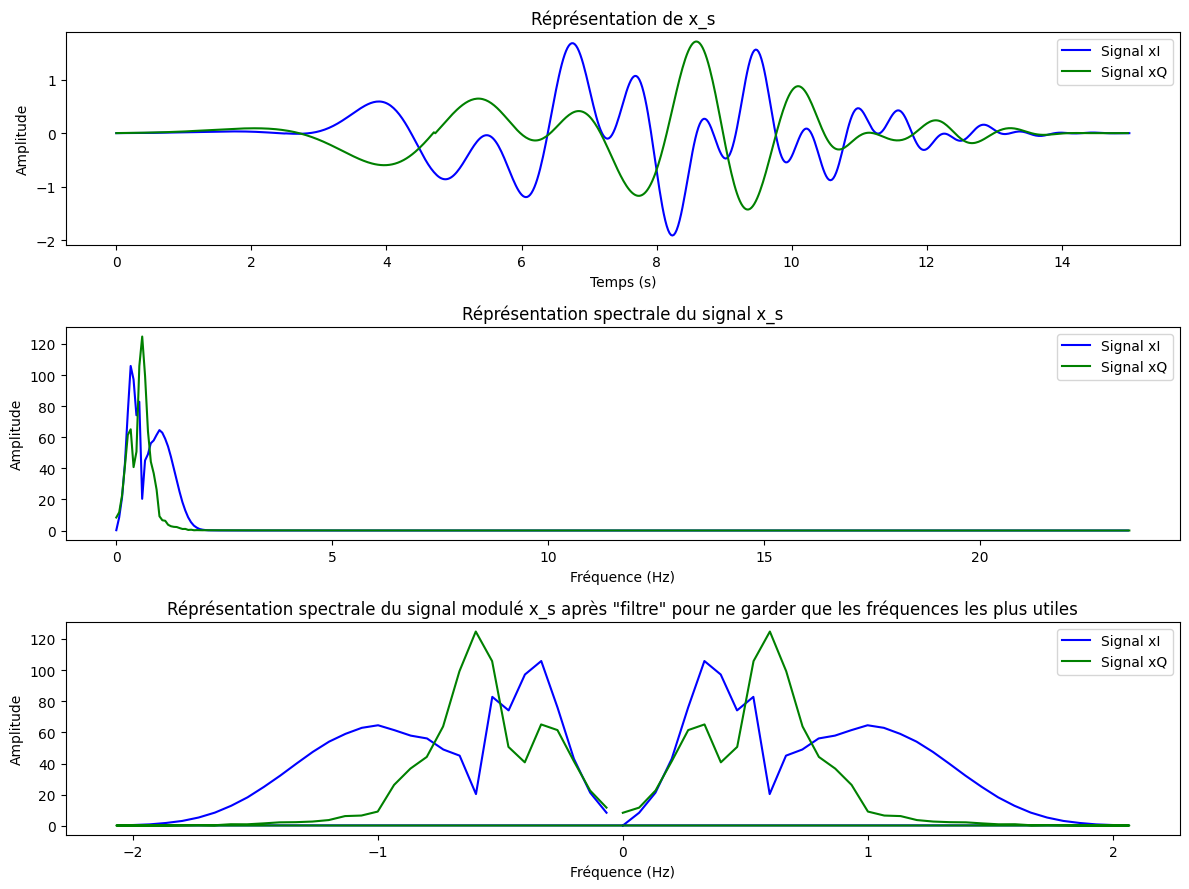

In [16]:
n=1
N_m=len(x_mIQ)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_sI=[]
t1I=[]
t_compI=int(0)

while t_compI<T:
    indice=int(np.floor(t_compI*N_m/T))
    x_sI.append(x_mIQ[indice])
    t1I.append(t_compI)
    t_compI+=dt

x_sQ=[]
t1Q=[]
t_compQ=int(0)
indiceQ=0
while indiceQ<(N_m-1):
    x_sQ.append(x_mIQ[indiceQ])
    t1Q.append(t_compQ)
    t_compQ+=dt
    indiceQ=int(np.floor((t_compQ+1/(4*fc))*N_m/T))


x_sI=np.array(x_sI)
t1I=np.array(t1I)
x_sQ=np.array(x_sQ)
t1Q=np.array(t1Q)


#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1I,x_sI, color='blue', label='Signal xI')
plt.plot(t1Q,x_sQ, color='green', label='Signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')
plt.legend(loc='upper right')

X_sI=np.fft.fft(x_sI)
freq_sI=np.fft.fftfreq(len(X_sI), d=1/f_s)
X_sQ=np.fft.fft(x_sQ)
freq_sQ=np.fft.fftfreq(len(X_sQ), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_sI[freq_sI>=0],np.abs(X_sI[freq_sI>=0]), color='blue', label='Signal xI')
plt.plot(freq_sQ[freq_sQ>=0],np.abs(X_sQ[freq_sQ>=0]), color='green', label='Signal xQ')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')
plt.legend(loc='upper right')

indice_à_garderI = np.abs(X_sI) > 0.2
X_s_tildI=X_sI[indice_à_garderI]
freq_s_tildI=freq_sI[indice_à_garderI]
indice_à_garderQ = np.abs(X_sQ) > 0.2
X_s_tildQ=X_sQ[indice_à_garderQ]
freq_s_tildQ=freq_sQ[indice_à_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_s_tildI,np.abs(X_s_tildI), color='blue', label='Signal xI')  
plt.plot(freq_s_tildQ,np.abs(X_s_tildQ), color='green', label='Signal xQ')  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_s après "filtre" pour ne garder que les fréquences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.plot()

 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en échantillonnant à une fréquence 47Hz): avec une fréquence bien choisie, on ne "récupère" lors de l'échantillonage que les extremas de l'enveloppe du à la modulation (i.e. du à la multiplication par $cos(2 \pi f_c t)$).

Cette méthode à l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'économiser de la bande passante.

De plus, étant donné le déphasage mis en lumière précédement (partie II) entre le $cosinus$ et le $sinus$, il est possible en choisissant une fréquence d'échantillongae ou l'autre (avec ou sans décallage du au retard du $sinus$) d'uniquement récupérer  les extremas correspondants à un des deux signaux. 

Par exemple comme le $sinus$ s'annule quand le $cosinus$ est extremum, en échantillonant à la même fréquence que dans I.C, on ne récupèrerera que les valeurs lors des extremas du $cosinus$ (et on ne récuperera rien du $sinus$ étant donné que ce dernier sera nul aux instants d'échantillonage) correspondant donc aux valeurs du signal $x_I$. Il est ainsi possible de resconstruire $x_I$ à partir de $x_m$. 

De même pour $x_Q$.

## IV. Modulation et démodulation SSB-SC (Single-SideBand Supressed-Carrier)

Si on n’a q’un seul signal 𝑥(𝑡) à transmettre, une autre
façon d’économiser la bande passante est la modulation à
bande unique “SSB-SC” ; pourquoi ? Reprendre les questions
les questions de la partie I dans ce cas (pour la modulation,
on pourra utiliser la fonction scipy.signal.hilbert).


La méthode de modulation par bande latérale unique(ou SSB: single-sideband modulation en anglais) est un mode de modulation qui consiste en une **modulation d'amplitude** dans laquelle on a supprimé la porteuse et l'une des bandes latérales. Cela permet ainsi d'**écononomiser de la bande passante** (moins de données à transmettre).



### A. Modulation

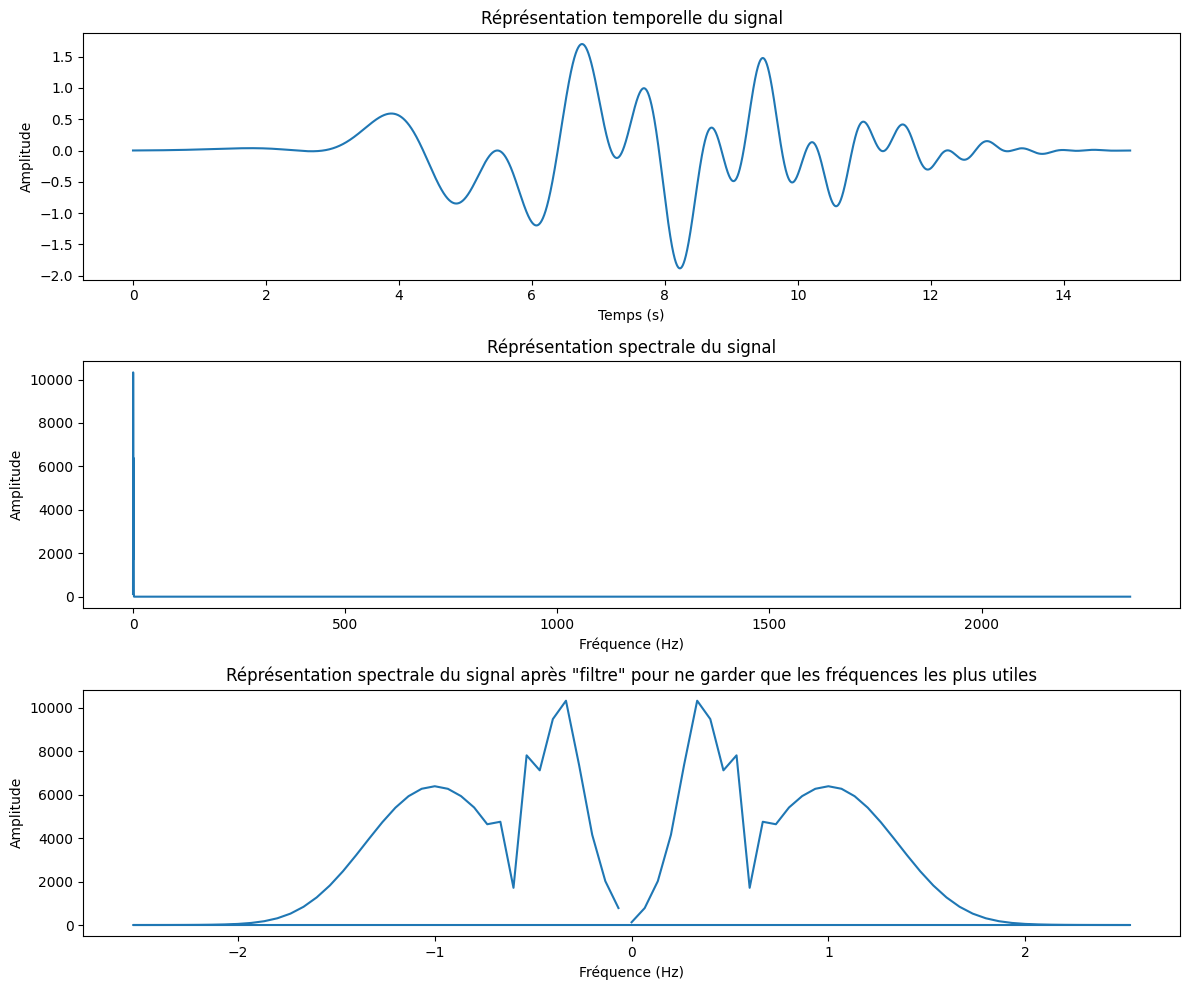

In [17]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T


xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal')

#Représentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')

indice_à_garder = np.abs(X) > 1
X_tild=X[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


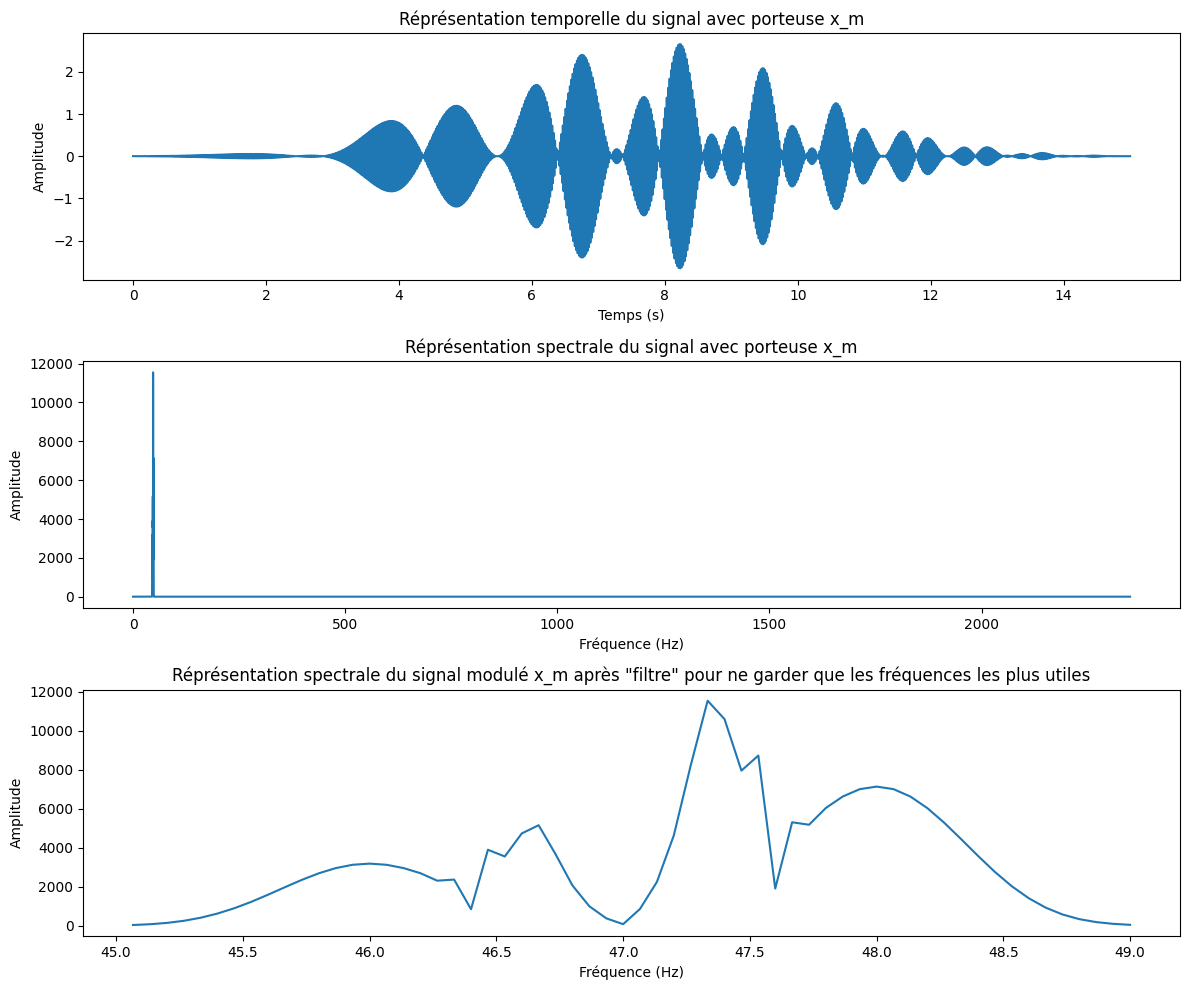

In [18]:
#fabrication du signal modulé
x_m = x*np.cos(2*np.pi*fc*t)-sig.hilbert(x)*np.sin(2*np.pi*fc*t)

# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_m) > 40
X_m_tild=X_m[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On remarque que la transformée d'Hilbert ne parvient pas à supprimer entièrement la partie "gauche" du spectre, mais à tout de même diminué l'amplitude de cette partie. Nous allons montrer que cette diminution ne change rien à la démodulation et permet toujours de reconstruire le signal initial. En montrant que cette diminution n'a pas d'impacte, cela montrera en même temps que la suppression totale de cette partie n'en aura pas non plus.

### B. Démodulation synchrone “analogique”

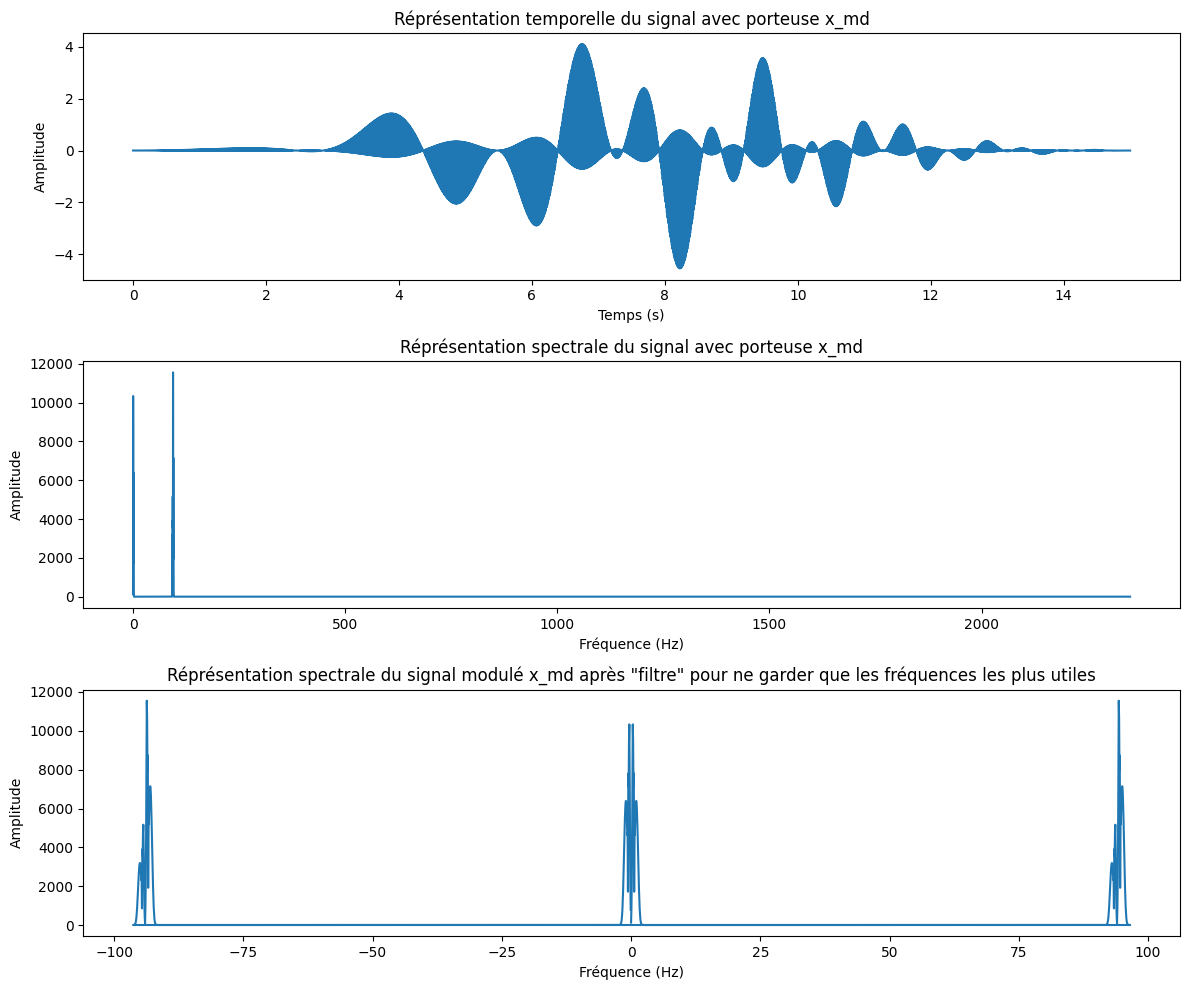

In [19]:
#fabrication du signal modulé
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')

indice_à_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

Pour filtrer le signal, on utilise un **filtre de Butterworth** de fréquence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement idéal). On choisit ces valeurs numériques au vu des tracés et études précédentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du à la modulation).


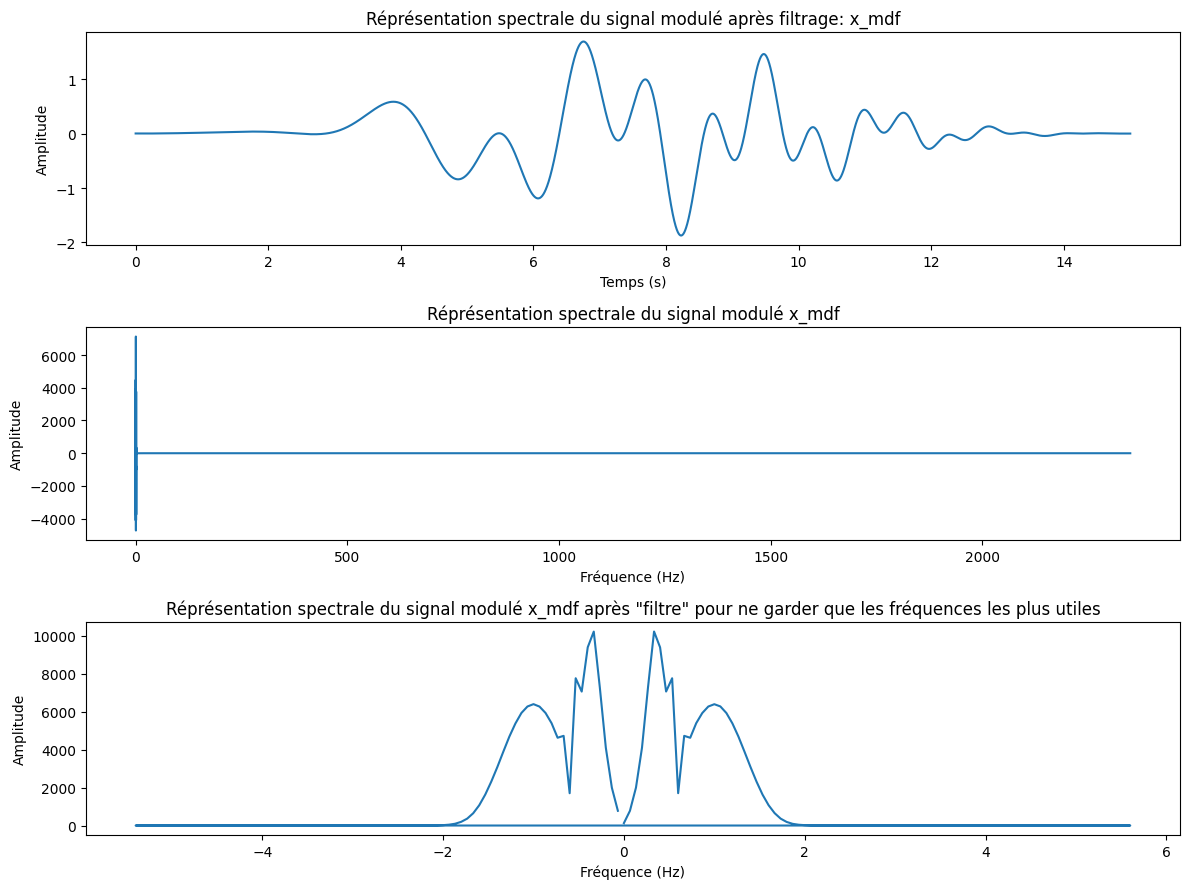

In [20]:
#filtre passe bas de fréquence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé après filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf')

indice_à_garder = np.abs(X_mdf) > 1
X_mdf_tild=X_mdf[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. En filtrant les hautes fréquences, on a supprimé les composantes spectrales de fréquence plus grande que 40Hz. Ainsi, on a supprimer la modulation ajoutée sur le signal.



Pour un échantillonage après démodulation, il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un échantillonage avant démodulation, il faudrait échantillonner $x_{m}$ à une fréquence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est préférable d'échantillonner le signal **après démodulation**, car ce dernier sera moins coûteux (fréquence d'échantillonnage $f_e$ plus faible dans ce cas).

### C. Démodulation synchrone par sous-échantillonnage


[]

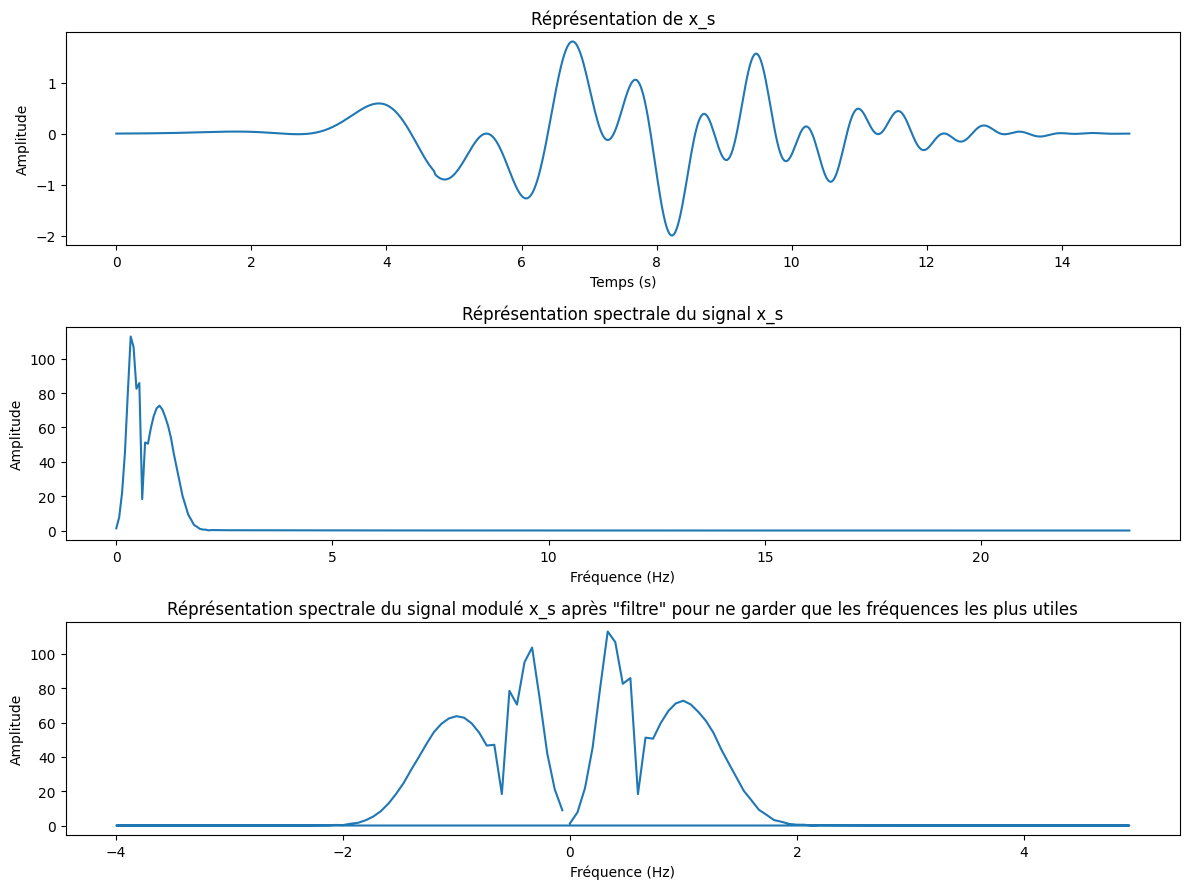

In [21]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')

indice_à_garder = np.abs(X_s) > 0.1
X_s_tild=X_s[indice_à_garder]
freq_s_tild=freq_s[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_s après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en échantillonnant à une fréquence 47Hz): avec une fréquence bien choisie, on ne "récupère" lors de l'échantillonage que les extremas de l'enveloppe du à la modulation (i.e. du à la multiplication par $cos(2 \pi f_c t)$).

Cette méthode à l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'économiser de la bande passante.



**Conclusion:**

La diminution da la partie "gauche" du spectre ne change rien  la restitution du signal. Ainsi, il est possible d'envisager sa supression pour economiser de la bande pasante (qui sera ainsi divisée par deux).